# Monte Carlo Coding Video: 
# https://www.youtube.com/watch?v=yA6_V-v3ODo

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [50]:
def get_calories_burned(lower_temp, upper_temp, avg_tol, sd_tol, avg_calories_burned):
    #get the temp
    temp = np.random.uniform(lower_temp, upper_temp)
    
    #get the tolerance
    tol = np.random.normal(avg_tol, sd_tol)
    
    #if the temp is higher than our tolerance, then run
    if temp > tol:
        cals = np.random.exponential(avg_calories_burned)
    else:
        cals = 0
        
    return cals

In [62]:
num_days = 1000000
daily_calories = []

start = time()
for _ in range(num_days):
    cals = get_calories_burned(40, 60, 55, 5, 200)
    daily_calories.append(cals)
end = time()
print(end - start)

18.804136753082275


Text(0.5, 1.0, '54.060966025098885')

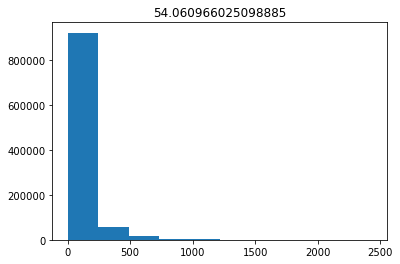

In [63]:
plt.hist(daily_calories)
plt.title(np.mean(daily_calories))

In [64]:
print(len([i for i in daily_calories if i == 0]) / num_days)

0.730156


# Efficient Method : Vectorization

In [66]:
start = time()

#get all temps at once
temps = np.random.uniform(40, 60, num_days)

#get all the tolerances at once
tols = np.random.normal(55, 5, num_days)

#get all the calories at once
daily_calories = np.random.exponential(200, num_days)

#if temp is less than tol, then you didnt run
daily_calories[temps < tols] = 0

end = time()
print(end - start)

0.2194535732269287


Text(0.5, 1.0, '54.275049753539044')

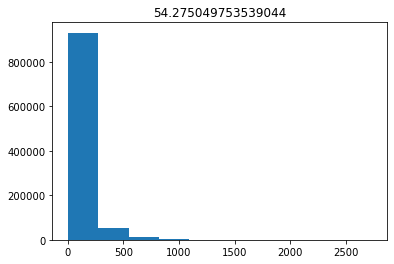

In [67]:
plt.hist(daily_calories)
plt.title(np.mean(daily_calories))

In [68]:
print(len([i for i in daily_calories if i == 0]) / num_days)

0.729439
